**Factory Method** is a creational design pattern that provides an interface for creating objects in a superclass, but allows subclasses to alter the type of objects that will be created.

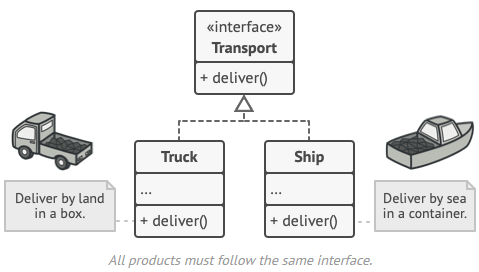

**Applicability**

-  **Use the Factory Method when you don’t know beforehand the exact types and dependencies of the objects your code should work with.**


    > The Factory Method separates product construction code from the code that actually uses the product. Therefore it’s easier to extend the product construction code independently from the rest of the code.
    
    >For example, to add a new product type to the app, you’ll only need to create a new creator subclass and override the factory method in it.

- **Use the Factory Method when you want to provide users of your library or framework with a way to extend its internal components.**

    > Inheritance is probably the easiest way to extend the default behavior of a library or framework. But how would the framework recognize that your subclass should be used instead of a standard component?

    > The solution is to reduce the code that constructs components across the framework into a single factory method and let anyone override this method in addition to extending the component itself.

- Use the Factory Method when you want to save system resources by reusing existing objects instead of rebuilding them each time.

   > You often experience this need when dealing with large, resource-intensive objects such as database connections, file systems, and network resources.

   > You need to have a regular method capable of creating new objects as well as reusing existing ones. That sounds very much like a factory method.

In [1]:
from __future__ import annotations
from abc import ABC, abstractmethod


class Creator(ABC):
    """
    The Creator class declares the factory method that is supposed to return an
    object of a Product class. The Creator's subclasses usually provide the
    implementation of this method.
    """

    @abstractmethod
    def factory_method(self):
        """
        Note that the Creator may also provide some default implementation of
        the factory method.
        """
        pass

    def some_operation(self) -> str:
        """
        Also note that, despite its name, the Creator's primary responsibility
        is not creating products. Usually, it contains some core business logic
        that relies on Product objects, returned by the factory method.
        Subclasses can indirectly change that business logic by overriding the
        factory method and returning a different type of product from it.
        """

        # Call the factory method to create a Product object.
        product = self.factory_method()

        # Now, use the product.
        result = f"Creator: The same creator's code has just worked with {product.operation()}"

        return result


"""
Concrete Creators override the factory method in order to change the resulting
product's type.
"""


class ConcreteCreator1(Creator):
    """
    Note that the signature of the method still uses the abstract product type,
    even though the concrete product is actually returned from the method. This
    way the Creator can stay independent of concrete product classes.
    """

    def factory_method(self) -> Product:
        return ConcreteProduct1()


class ConcreteCreator2(Creator):
    def factory_method(self) -> Product:
        return ConcreteProduct2()


class Product(ABC):
    """
    The Product interface declares the operations that all concrete products
    must implement.
    """

    @abstractmethod
    def operation(self) -> str:
        pass


"""
Concrete Products provide various implementations of the Product interface.
"""


class ConcreteProduct1(Product):
    def operation(self) -> str:
        return "{Result of the ConcreteProduct1}"


class ConcreteProduct2(Product):
    def operation(self) -> str:
        return "{Result of the ConcreteProduct2}"


def client_code(creator: Creator) -> None:
    """
    The client code works with an instance of a concrete creator, albeit through
    its base interface. As long as the client keeps working with the creator via
    the base interface, you can pass it any creator's subclass.
    """

    print(f"Client: I'm not aware of the creator's class, but it still works.\n"
          f"{creator.some_operation()}", end="")


if __name__ == "__main__":
    print("App: Launched with the ConcreteCreator1.")
    client_code(ConcreteCreator1())
    print("\n")

    print("App: Launched with the ConcreteCreator2.")
    client_code(ConcreteCreator2())

App: Launched with the ConcreteCreator1.
Client: I'm not aware of the creator's class, but it still works.
Creator: The same creator's code has just worked with {Result of the ConcreteProduct1}

App: Launched with the ConcreteCreator2.
Client: I'm not aware of the creator's class, but it still works.
Creator: The same creator's code has just worked with {Result of the ConcreteProduct2}